# GROUP: Rachana Choudhary(18510063), Nitish goyal(18510053)

# PH509 Lab 2A

## Implementation of Euler and Euler-Cromer ODE. 

### a
Write a function for solving the Newton's laws of motion $$\frac{d^2 x}{dt^2} = a(x, \dot{x}, t),$$ using Euler and Euler-Cromer algorithms. As shown in class, this 2nd order ODE can be broken into a set of 2 coupled 1st order ODEs:

$$ \frac{d}{dt} \begin{pmatrix}x \\ v \end{pmatrix} = \begin{pmatrix} {v} \\ a(x,v,t) \end{pmatrix}$$

The $\texttt{EulerODE}(\, )$ function should take following as input:

a. a list or array containing initial condition for $x$ and $v$ i.e. $[x_0, v_0]$.

b. a list or array with starting time and end time i.e. $[t_0, t_{max}]$.

c. The function to calculate the right-hand side of the above equation. It can be defined with a Python function as follows:

$$\texttt{rhs} \; \Big(x_{k}, v_{k}, t_{k} \Big):$$ 

and return a list containing the velocity and acceleration at time $t_k$:

$$ \texttt{return} \qquad \Big[ v[t_k], \, a[t_k] \Big]$$

Hence the functional form for the $\texttt{EulerODE}$ should be as follows: 

$$\texttt{EulerODE} \Big([x_0, v_0], \; [t_0, t_{max}], \; rhs\Big)$$

Make a similar function for Euler-Cromer algorithm $\texttt{EulerCromerODE}(\, )$. 

### b

Use these functions to solve for the simple harmonic pendulum:
$$\frac{d^2 \theta}{dt^2} =  − k \, sin \theta,$$
with boundary conditions:
at $t = 0$, $\theta = \pi/4, \dot{\theta} = 0$. Note that the initial amplitude is quite large, so it is not really a simple harmonic oscillator.

Plot $\theta$ Vs $t$ and the phase space trajectory. 

Explore the system for small oscillations and explain any qualitative difference from the previous case. (For this choose suitable boundary conditions).

### c
Plot the total energy as a function of time for both the methods. Notice any oscillations?




In [134]:

import numpy as np
import matplotlib.pyplot as plt


In [135]:
def rhs(xk, vk, t):
    ak = -xk
    return(vk, ak)

In [136]:
def solve_E(in_con, time, rhs):                     #Solution by euler method(explicit)
    t = np.linspace(time[0], time[1], 1000)
    dt=t[1]-t[0]
    tau=1
    x=[in_con[0]]
    v=[in_con[1]]
    for i in range(999):
        vk,ak = rhs(x[i], v[i], t[i])
        x.append(0)
        x[i+1] = x[i] + vk * dt
        v.append(0)    
        v[i+1] = v[i] + ak * dt
    return(x,v,t)
x,v,t = solve_E([0.5,0], [0,50], rhs)

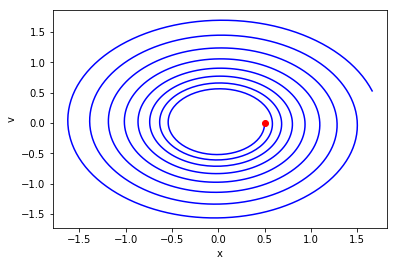

In [138]:
plt.figure(1)
plt.plot(x,v,'b')
plt.xlabel('x')
plt.ylabel('v')
plt.plot(0.5,0,'ro')
plt.show()



Text(0, 0.5, 'x')

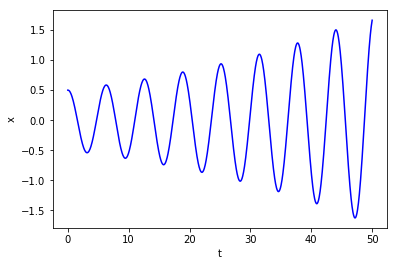

In [139]:
plt.figure(2)
plt.plot(t,x,'b')
plt.xlabel('t')
plt.ylabel('x')


In [140]:
import numpy as np
import matplotlib.pyplot as plt

In [141]:
def rhs(xk, vk, t):
    ak = -xk
    return(vk, ak)

In [142]:
def solve_Ek(in_con, time, rhs):                     #Solution by Euler-Krommer method(implicit)
    t = np.linspace(time[0], time[1], 1000)
    dt=t[1]-t[0]
    tau=1
    x=[in_con[0]]
    v=[in_con[1]]
    for i in range(999):
        vk,ak = rhs(x[i], v[i], t[i])
        v.append(0)    
        v[i+1] = v[i] + ak * dt
        x.append(0)
        x[i+1] = x[i] + v[i+1] * dt
    return(x, v, t)
x,v,t = solve_Ek([0.5,0], [0,50], rhs)

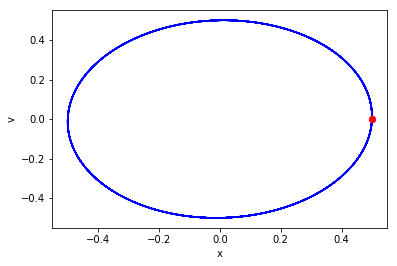

In [144]:
plt.figure(1)
plt.plot(x,v,'b')
plt.plot(.5,0,'ro')
plt.xlabel('x')
plt.ylabel('v')
plt.plot(0.5,0,'ro')
plt.show()

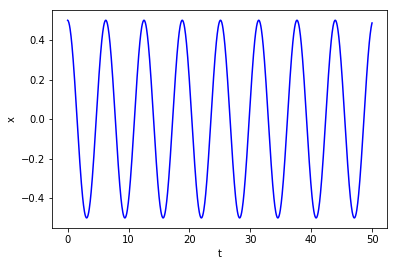

In [145]:
plt.figure(2)
plt.plot(t,x,'b')
plt.xlabel('t')
plt.ylabel('x')
plt.show()

In [146]:
# b part

In [147]:

# here theta is denoted as x and omega is denoted as v and alpha is denoted as a
def rhs(xk, vk, t):  
    ak = -np.sin(xk)
    return vk,ak

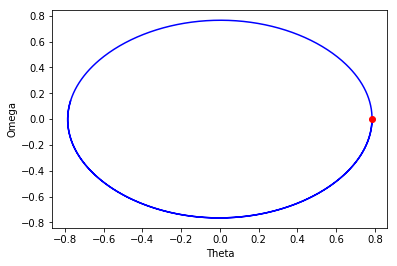

In [148]:
x,v,t = solve_Ek([np.pi/4,0], [0,10], rhs)
plt.figure(1)
plt.plot(x,v,'b')
plt.plot(np.pi/4,0,'ro')
plt.xlabel('Theta')
plt.ylabel('Omega')
plt.show()


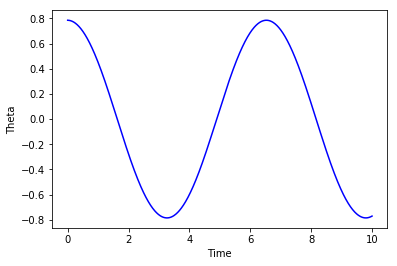

In [149]:
plt.figure(2)
plt.plot(t,x,'b')
plt.xlabel('Time')
plt.ylabel('Theta')
plt.show()

In [150]:
# clearly in above phase space trajectory, closed figure is a bit tilted which is not a perfect circle

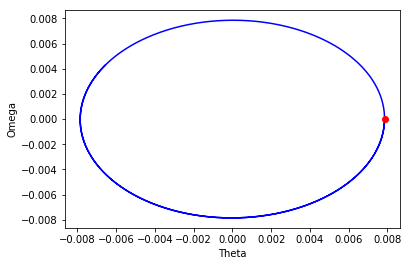

In [151]:
# For small oscillations
x,v,t = solve([np.pi/400,0], [0,10], rhs)
plt.figure(1)
plt.plot(x,v,'b')
plt.plot(np.pi/400,0,'ro')
plt.xlabel('Theta')
plt.ylabel('Omega')
plt.show()



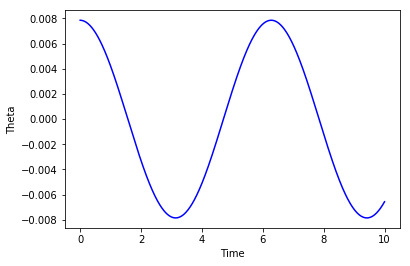

In [152]:
plt.figure(2)
plt.plot(t,x,'b')
plt.xlabel('Time')
plt.ylabel('Theta')
plt.show()

In [164]:
# CLEARLY decreasing the angle makes phase trajectory more circular


In [165]:
x,v,t = solve_Ek([np.pi/4,0], [0,10], rhs)  #Total energy graph for euler-kromer method

In [166]:
# Total energy as a function of time 
x=np.array(x)
v=np.array(v)
total_e=.5*v**2 +.5*x**2

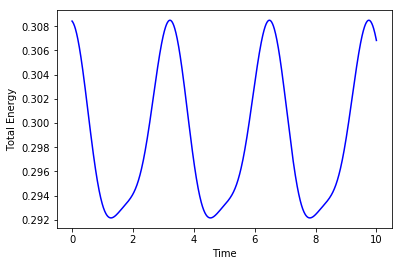

In [167]:
plt.figure(1)
plt.plot(t,total_e,'b')
plt.xlabel('Time')
plt.ylabel('Total Energy')
plt.show()

In [156]:
# The above total energy graph is for small oscillations for E-k method

In [161]:
x,v,t = solve_E([np.pi/4,0], [0,10], rhs)  #total energy graph is for Euler method

In [162]:
x=np.array(x)
v=np.array(v)
total_e=.5*v**2 +.5*x**2

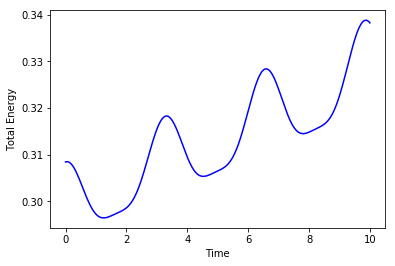

In [163]:
plt.figure(1)
plt.plot(t,total_e,'b')
plt.xlabel('Time')
plt.ylabel('Total Energy')
plt.show()

In [ ]:
# The above total energy graph is for Euler method